In [1]:
# BEFORE GETTING STARTED
# 1. if at LCLS load the anaconda session
# source ~marcoc/setups/ana-marco3k-setup.sh
# 2. start ipython
# ipython3

In [2]:
# there are two main files:

# 1. dispersiveXanes_alignment.py (deals with images)
# 2. xanes_analyzeRun.py (deals with run and images reading)

# In xanes_analyzeRun.py there are few global variables that need to be adapted to the current analysis
# g_exp   = "xppl3716"                                       ## Experiment name
# g_bml   = g_exp[:3]                                        ## beamline name (needed for x3py)
# basedir = os.path.dirname(__file__)                        ## Current Working Directory
# g_folder_init = basedir + "/" +g_exp+"_init_pars/"         ## folder to 'store alignement parameters
# g_folder_out  = basedir + "/" +g_exp+"_output/"            ## folder to save output
# g_folder_data = "/reg/d/psdm/"+g_bml+"/"+ g_exp +"/hdf5/"  ## where to find data


In [3]:
%matplotlib nbagg
import matplotlib
import matplotlib.pylab as plt
matplotlib.style.use("ggplot")
import pprint
import numpy as np
np.warnings.simplefilter('ignore')

import xanes_analyzeRun
import dispersiveXanes_alignment as alignment

Reading configuration file /home/marco/programs/mylibs/python_modules/x3py/x3py_config
Reading configuration file ./x3py_config
Using /home/marco/.cache/x3py as cache folder, current size 552.36 KB
Working on experiment xppl3716 (beamline xpp)
 folder data      → /home/marco/LCLS/xppl3716/dispersiveXanes_github/xppl3716_data/
 folder init_pars → /home/marco/LCLS/xppl3716/dispersiveXanes_github/xppl3716_init_pars/
 folder outout    → /home/marco/LCLS/xppl3716/dispersiveXanes_github/xppl3716_output/


# Doing first alignment without sample

In [4]:
# define starting parameters for analysis; passed directly to iminuit so things like
# limits, or fix_scalex=True, etc. can be used
pars = dict( transx = 55, transy = -10, scalex = 0.9, scaley = 1.1, rotation = -0.02 )
# default parameters can be found in alignment.g_fit_default_kw
# you can have a look by uncommenting the following line:
# pprint.pprint(alignment.g_fit_default_kw)

In [5]:
# define the run
r = xanes_analyzeRun.AnalyzeRun(80,initAlign=pars)

Building paths list of HDF5 file(s)...done 0.08 s
Defining ebeam......done 0.02 s
Defining opal2.....(as general detector).....done 0.02 s
Defining opal0.....(as general detector).....done 0.03 s
Defining opal1.....(as general detector).....done 0.03 s
Found in cache:  []
Time stamp matching started ......done 0.02 s


<IPython.core.display.Javascript object>


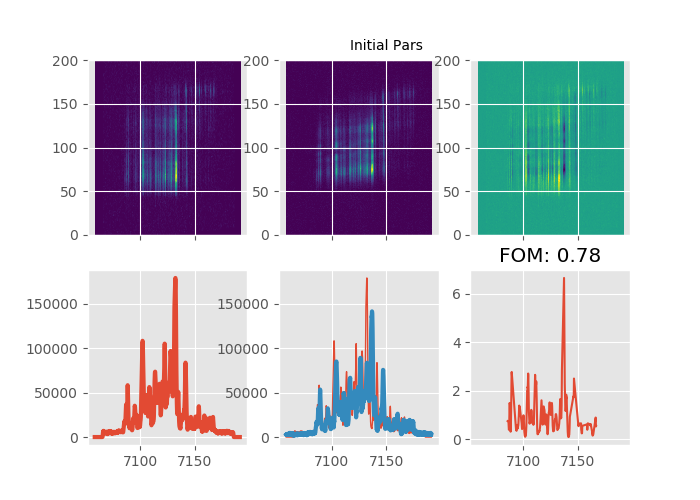

Enter to start fit


<IPython.core.display.Javascript object>


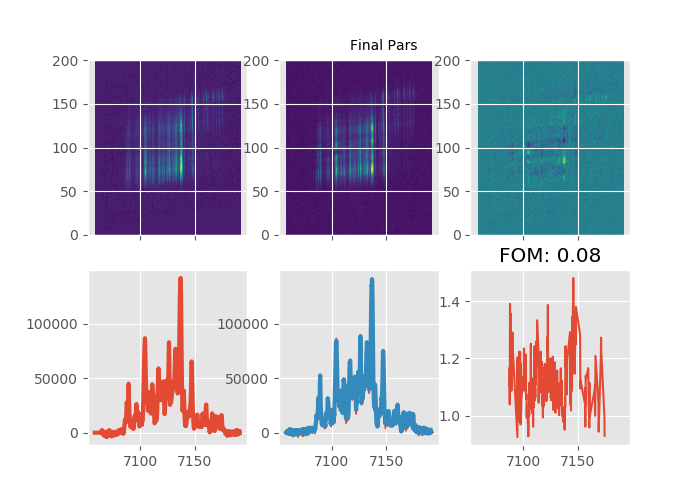

<IPython.core.display.Javascript object>


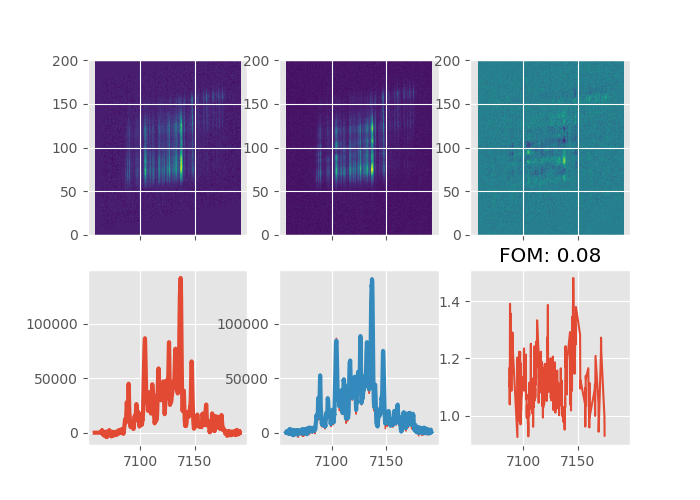

fit_ret(init_pars={'intensity': 2.3005231223663603, 'error_intensity': 0.02, 'limit_intensity': None, 'fix_intensity': False, 'igauss1cen': 512, 'error_igauss1cen': 2.0, 'limit_igauss1cen': None, 'fix_igauss1cen': True, 'igauss1sig': 4000.0, 'error_igauss1sig': 2.0, 'limit_igauss1sig': None, 'fix_igauss1sig': True, 'iblur1': 0, 'error_iblur1': 0.02, 'limit_iblur1': (0, 20), 'fix_iblur1': True, 'scalex': 0.9, 'error_scalex': 0.05, 'limit_scalex': (0.4, 1.2), 'fix_scalex': True, 'scaley': 1.1, 'error_scaley': 0.05, 'limit_scaley': (0.8, 1.2), 'fix_scaley': True, 'rotation': -0.02, 'error_rotation': 0.005, 'limit_rotation': (-0.06, 0.06), 'fix_rotation': True, 'transx': 55, 'error_transx': 3, 'limit_transx': (-400, 400), 'fix_transx': False, 'transy': -10, 'error_transy': 3, 'limit_transy': (-50, 50), 'fix_transy': False, 'shear': 0.0, 'error_shear': 0.001, 'limit_shear': (-0.2, 0.2), 'fix_shear': True, 'igauss2cen': 512, 'error_igauss2cen': 2.0, 'limit_igauss2cen': None, 'fix_igauss2cen'

In [6]:
# data are d.spec1 and d.spec2 (spec1 is the one **upbeam**)
# align one shot
# In this run, calib 0 has a sample in the beam. "Alignment" should be done without (calib 1,3,etc in run 80)
# show = True: show only output; showInit=True: show also starting parameters
r.doShot(shot=2,calib=1,doFit=True,show=True,showInit=True)

In [7]:
# save as default transformation for run (used when reloading without initAlign keywork)
r.saveTransform();

Saving roi and transformation parameter to /home/marco/LCLS/xppl3716/dispersiveXanes_github/xppl3716_init_pars//run0080_transform.npy


In [ ]:
# do several fits, return (and save) the best one
r.doShots(calib=1,shots=slice(0,20),doFit=True)
r.saveTransform() # saveTransform accept a filename as optional argument. If not given it will be automatically chosen

In [ ]:
# do more shots without fitting (using last r.initAlign)
# the return value is a list with lots of stuff for each shot
res = r.doShots(calib=1,shots=slice(200),doFit=False)

In [ ]:
ratio = res.ratio
alignment.plotRatios(ratio)
ref = np.nanmedian(ratio,axis=0)
print(ref)
#_ = plt.xlim(400,600)

# analyze another run (or part of the same run)using previous alignment

In [ ]:
rShot = xanes_analyzeRun.AnalyzeRun(80,initAlign="xppl3716_init_pars/run0080_transform.npy")

In [ ]:
out = rShot.doShots(calib=0,shots=slice(0,5))
ratios = out.ratio
plt.figure()
for i,r in enumerate(ratios):
  plt.plot(r/ref,label="Shot %d"%i)
trash = plt.ylim(0,1)
trash = plt.legend(loc=2)

In [ ]:
# save results in hdf file
rShot.save(overwrite=True)